In [3]:
import investpy

In [4]:
investpy.__author__

'Alvaro Bartolome <alvarob96@usal.es>'

In [5]:
investpy.__version__

'0.8.8'

In [6]:
%%time

df = investpy.get_historical_data(equity='bbva',
                                  from_date='01/01/2018',
                                  to_date='01/01/2019',
                                  as_json=False,
                                  debug=True)

INFO:investpy:Searching introduced equity on Investing.com
INFO:investpy:bbva found on Investing.com
INFO:investpy:Request sent to Investing.com!
INFO:investpy:Request to Investing.com data succeeded with code 200!
INFO:investpy:Data parsing process finished...


Wall time: 1.33 s


In [7]:
from statistics import mean

In [8]:
value = None
elements = list()
trends = list()

index = 0

for element in df['Close'].tolist():
    if value:
        if value > element:
            elements.append(element)
            value = mean(elements)
        else:
            if len(elements) > 5:
                min_value = min(elements)
                counter = 0
                for item in elements:
                    counter += 1
                    if item == min_value:
                        break
                end_trend = init_trend + counter
                
                obj = {
                    'init': init_trend,
                    'end': end_trend,
                    'elements': elements
                }
                
                trends.append(obj)
                
            value = None
            elements = list()
    else:
        init_trend = index
        
        elements.append(element)
        value = mean(elements)
        
    index += 1

In [9]:
df.reset_index(inplace=True)

In [10]:
for trend in trends:
    print(trend['init'], trend['end'])

22 60
91 105
130 138
147 176


In [11]:
value = 1

for trend in trends:
    counter = 0
    
    for index, row in df[trend['init']:trend['end']].iterrows():
        df.loc[index, 'trend'] = value
    value += 1

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style='darkgrid')

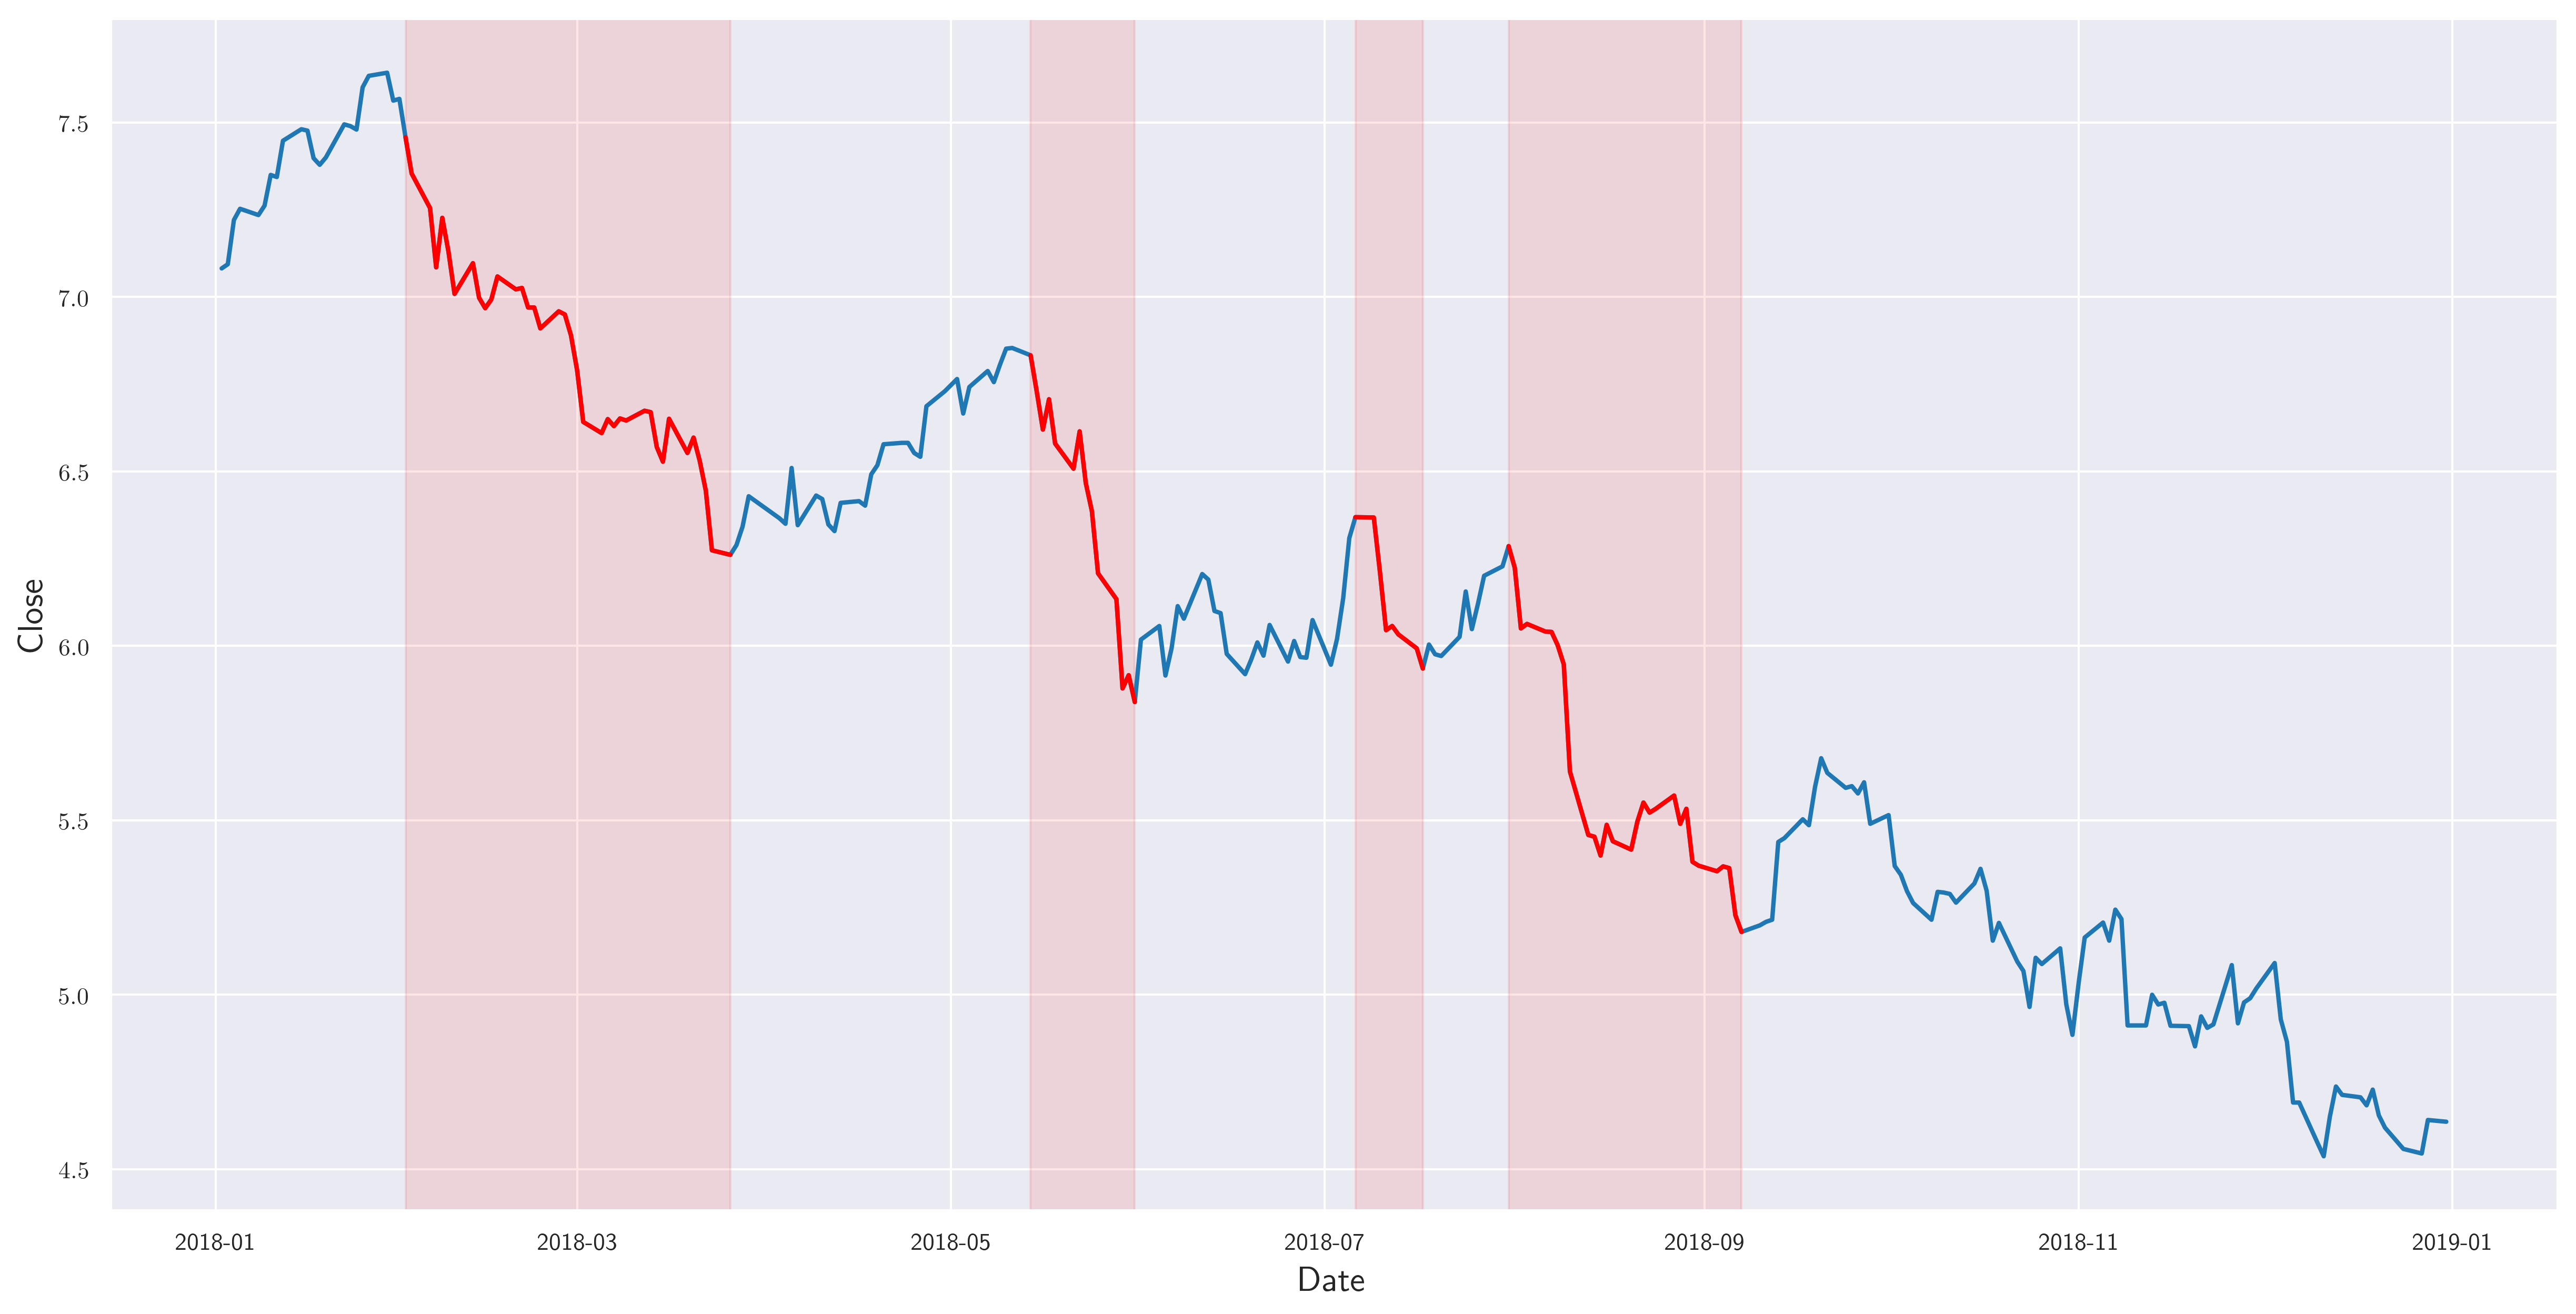

In [49]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np

from os.path import join

with plt.style.context('paper'):
    plt.figure(figsize=(20, 10))

    ax = sns.lineplot(x=df['Date'], y=df['Close'])

    for value in range(1, len(trends) + 1):
        sns.lineplot(x=df[df['trend'] == value]['Date'], y=df[df['trend'] == value]['Close'], color='red')
        ax.axvspan(df[df['trend'] == value]['Date'].iloc[0], df[df['trend'] == value]['Date'].iloc[-1], alpha=0.1, color='red')

    plt.savefig('hola.png')

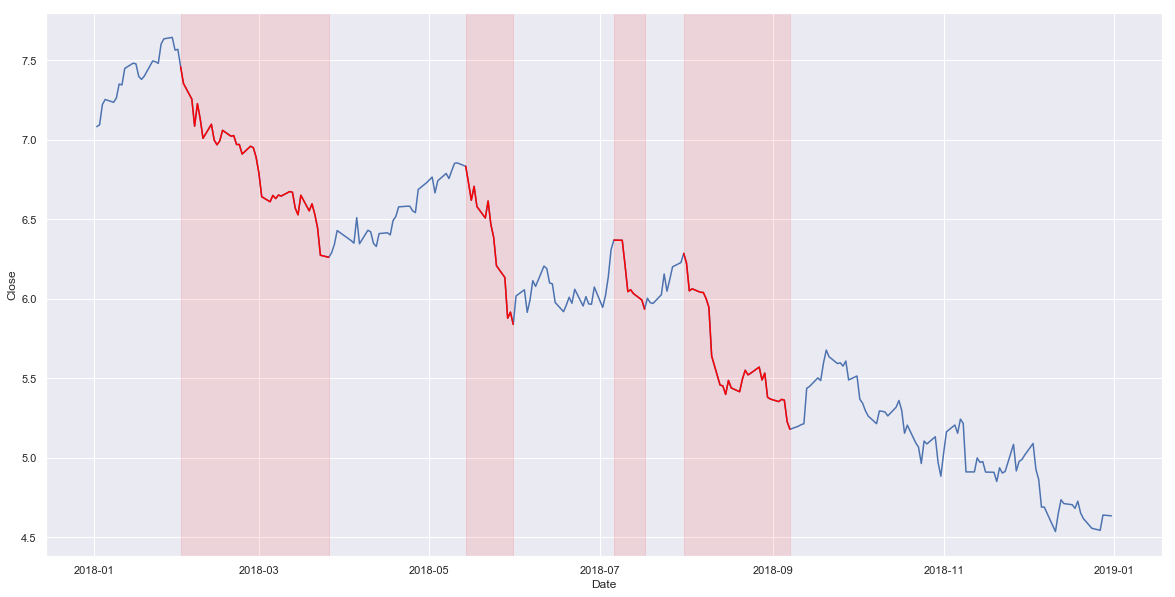

In [48]:
plt.figure(figsize=(20, 10))

ax = sns.lineplot(x=df['Date'], y=df['Close'])

for value in range(1, len(trends) + 1):
    sns.lineplot(x=df[df['trend'] == value]['Date'], y=df[df['trend'] == value]['Close'], color='red')
    ax.axvspan(df[df['trend'] == value]['Date'].iloc[0], df[df['trend'] == value]['Date'].iloc[-1], alpha=0.1, color='red')
    
plt.savefig()

In [14]:
import numpy as np

In [15]:
dx = np.diff(df['Close'].tolist())

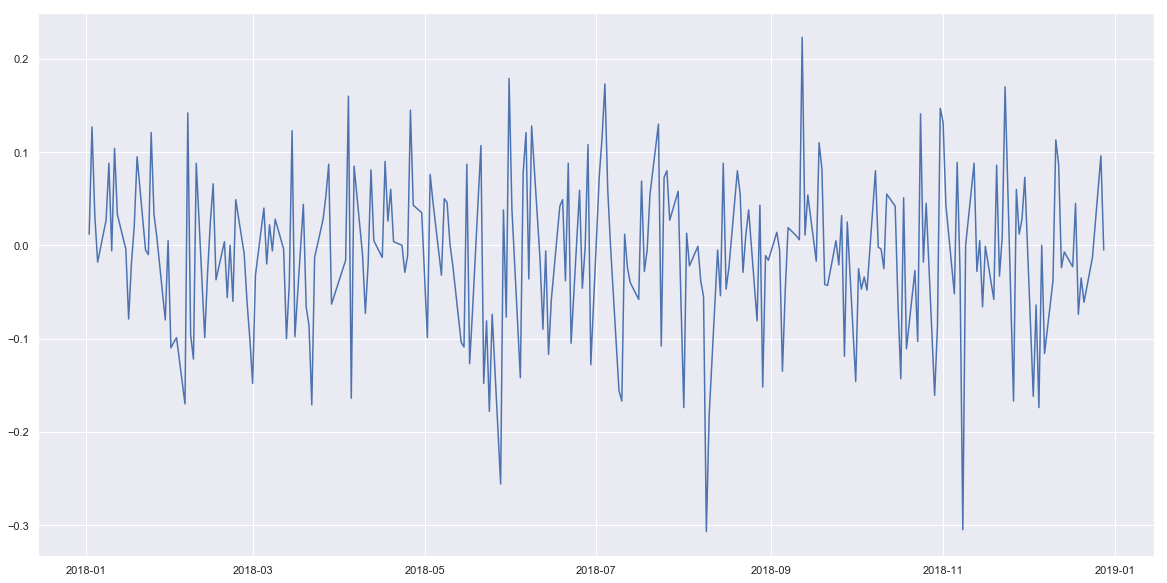

In [24]:
plt.figure(figsize=(20, 10))

sns.lineplot(x=df['Date'].tolist()[0:-1], y=dx)

In [32]:
import datetime

In [36]:
res = datetime.datetime.strptime('01.01.2018'.replace('.', '/'), '%d/%m/%Y')

In [41]:
res.strftime('%d/%m/%Y')

'01/01/2018'

In [38]:
str(res)

'2018-01-01 00:00:00'

In [46]:
for index, value in enumerate(df['Date'], 0):
    df.loc[index, 'new_date'] = value.strftime('%d/%m/%Y')

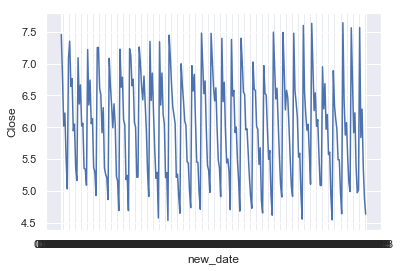

In [47]:
sns.lineplot(df['new_date'], df['Close'])

In [52]:
df.drop(columns=['new_date'], inplace=True)

In [53]:
df.head()

,Date,Open,High,Low,Close,Volume,trend
0,2018-01-02,7.139,7.169,7.050,7.082,15960000,NaN
1,2018-01-03,7.113,7.120,7.055,7.094,13320000,NaN
2,2018-01-04,7.113,7.274,7.104,7.221,20790000,NaN
3,2018-01-05,7.259,7.282,7.203,7.253,13580000,NaN
4,2018-01-08,7.274,7.293,7.220,7.235,13420000,NaN


In [54]:
a

[1, 2, 3]

In [55]:
np.negative(a)

array([-1, -2, -3])